# Data Exploration

In [133]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset

df =pd.read_csv("Walmart.csv")

df.head()


In [98]:
pd.options.display.float_format = '{:.2f}'.format

In [99]:
def season_getter(quarter):
    quarter_to_season = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return quarter_to_season.get(quarter, 'Invalid Quarter')

In [100]:
#Reframing the Column

df.Date=pd.to_datetime(df.Date,format ='mixed')

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year
df['season']=df['Date'].dt.quarter.map(season_getter)# applied the previously defined function to get the season names

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,season
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,6,5,2010,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,3,12,2010,Fall
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,4,2,2010,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,4,2,2010,Winter
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,0,5,2010,Spring


In [101]:
#checking dtypes of all column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   weekday       6435 non-null   int32         
 9   month         6435 non-null   int32         
 10  year          6435 non-null   int32         
 11  season        6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2), object(1)
memory usage: 528.0+ KB


In [102]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
year               3
season             4
weekday            7
month             12
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [103]:
#checking the null values

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
season          0
dtype: int64

In [104]:
#checking duplicated values

df.duplicated().sum()

0

# Exploratory Data Analysis

Univariate Analysis

In [105]:
# Descriptive Statisticals of Numerical columns

df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00
mean,1046964.88,60.66,3.36,171.58,8.00
std,564366.62,18.44,0.46,39.36,1.88
min,209986.25,-2.06,2.47,126.06,3.88
25%,553350.10,47.46,2.93,131.74,6.89
50%,960746.04,62.67,3.44,182.62,7.87
75%,1420158.66,74.94,3.73,212.74,8.62
max,3818686.45,100.14,4.47,227.23,14.31


'Temperature':Investigate the context of negative values and determine if they are valid or represent errors.If errors, clean or impute the data; if valid, consider the impact on the analysis.

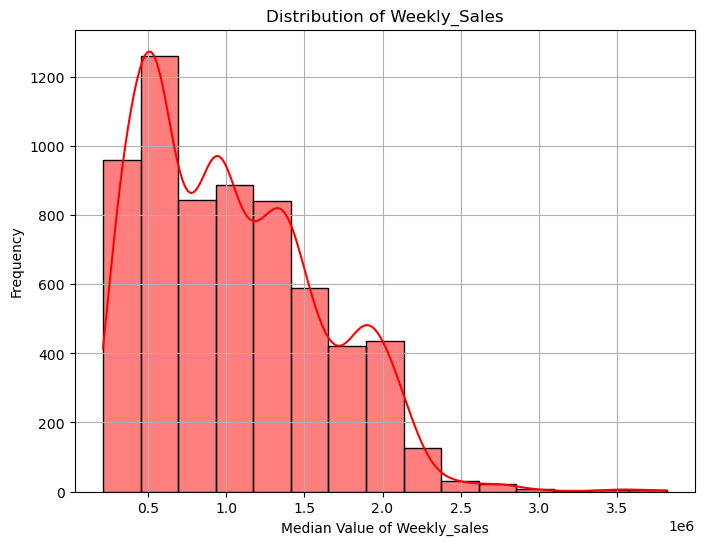

In [106]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Weekly_Sales', kde=True,bins = 15, color = 'r')
plt.title('Distribution of Weekly_Sales')
plt.xlabel('Median Value of Weekly_sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the above graph shows that,weekly_sales is right skewed.

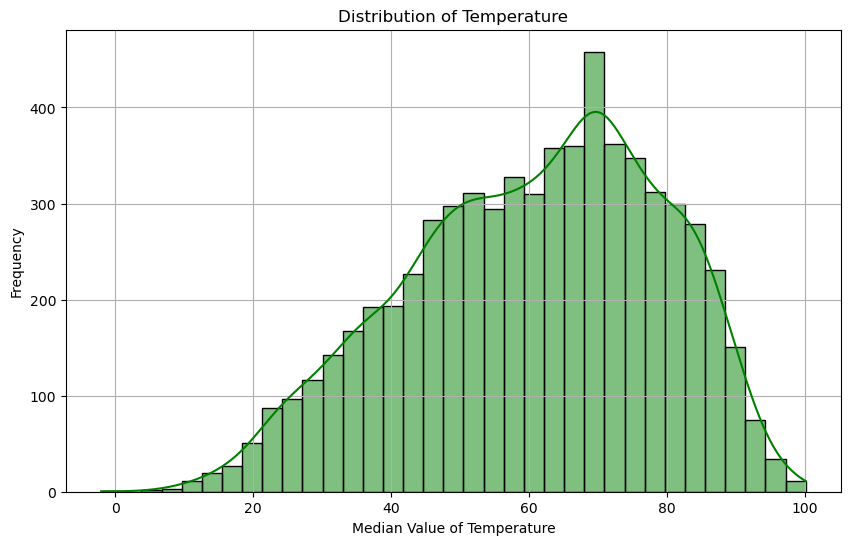

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Temperature', kde=True,color='green')
plt.title('Distribution of Temperature')
plt.xlabel('Median Value of Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

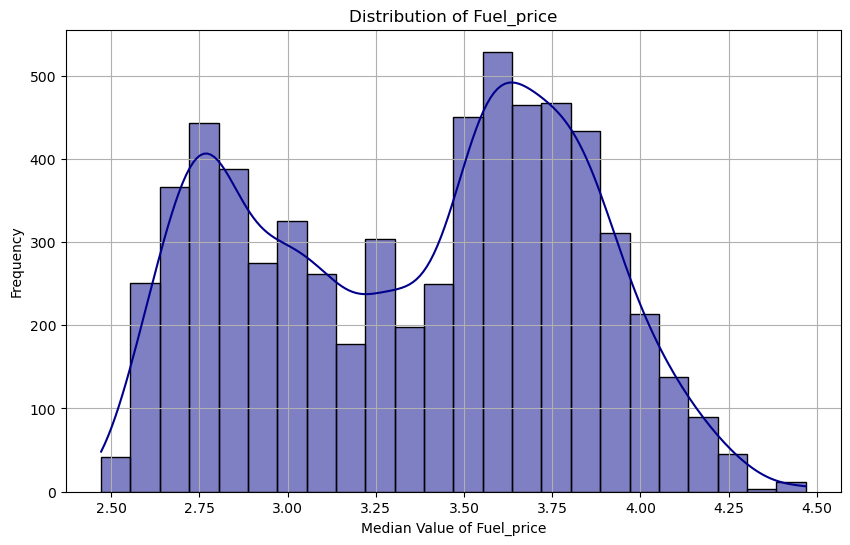

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fuel_Price', kde=True,color='darkblue')
plt.title('Distribution of Fuel_price')
plt.xlabel('Median Value of Fuel_price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

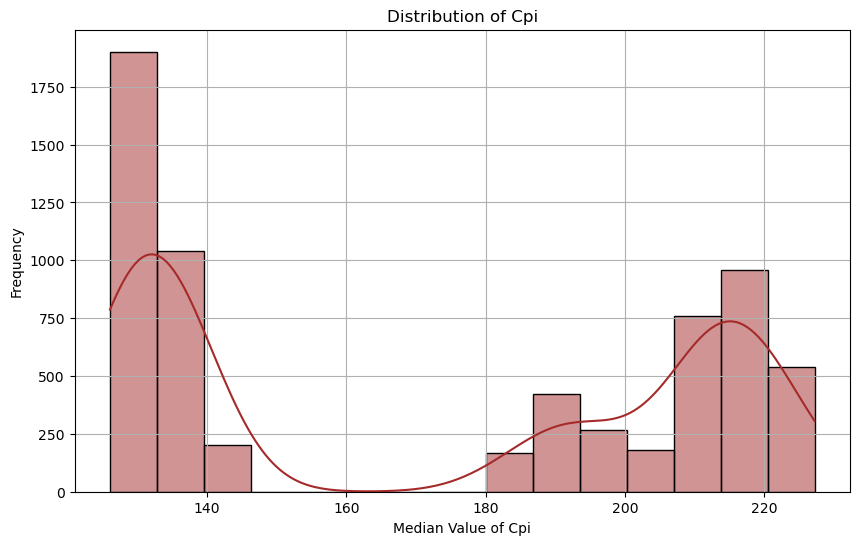

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CPI', kde=True,bins = 15, color = 'brown')
plt.title('Distribution of Cpi')
plt.xlabel('Median Value of Cpi')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

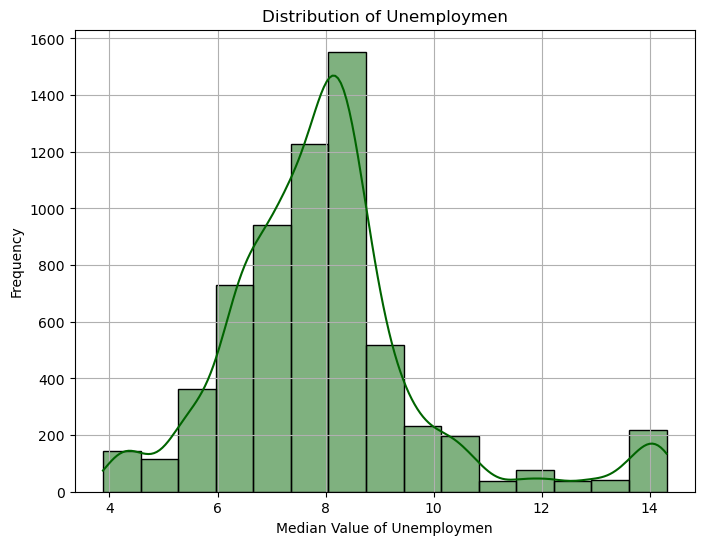

In [110]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Unemployment', kde=True,bins = 15, color = 'darkgreen')
plt.title('Distribution of Unemploymen')
plt.xlabel('Median Value of Unemploymen')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

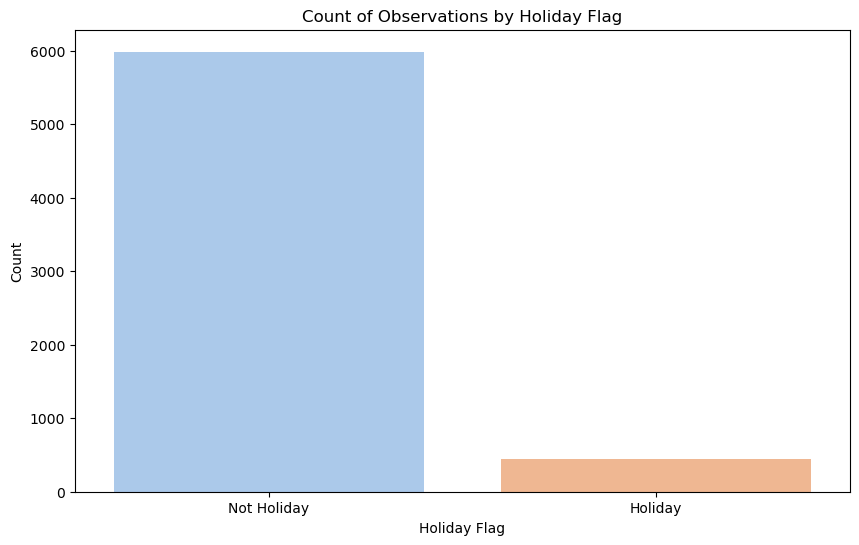

In [111]:
sns.countplot(data=df, x="Holiday_Flag", palette='pastel')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.title('Count of Observations by Holiday Flag')
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])

plt.show()

Holiday_Flag

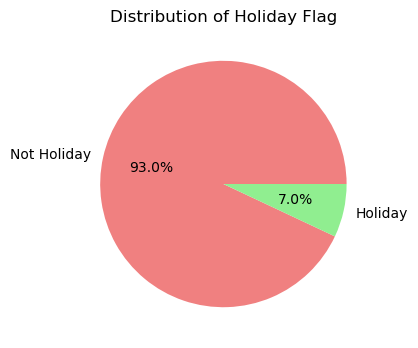

In [112]:
# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(df['Holiday_Flag'].value_counts(), labels=['Not Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Holiday Flag')
plt.show()

Season

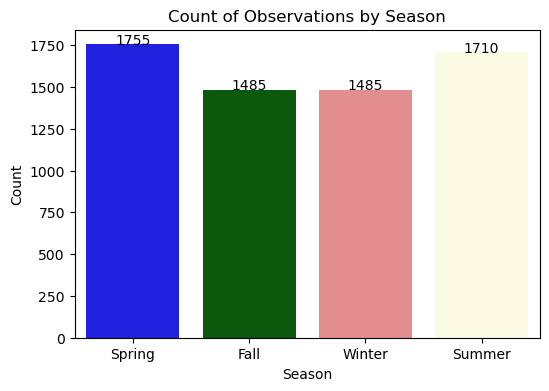

In [113]:
season_counts = df['season'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(data=df, x='season', ax=ax, palette=['blue', 'darkgreen', 'lightcoral', 'lightyellow'])

# Annotate the exact count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

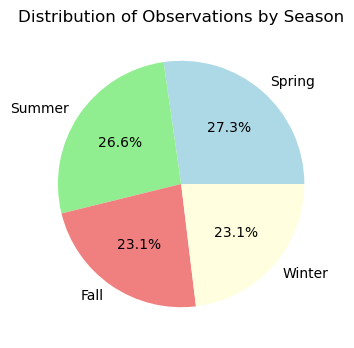

In [114]:
season_counts = df['season'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Distribution of Observations by Season')
plt.show()

Year

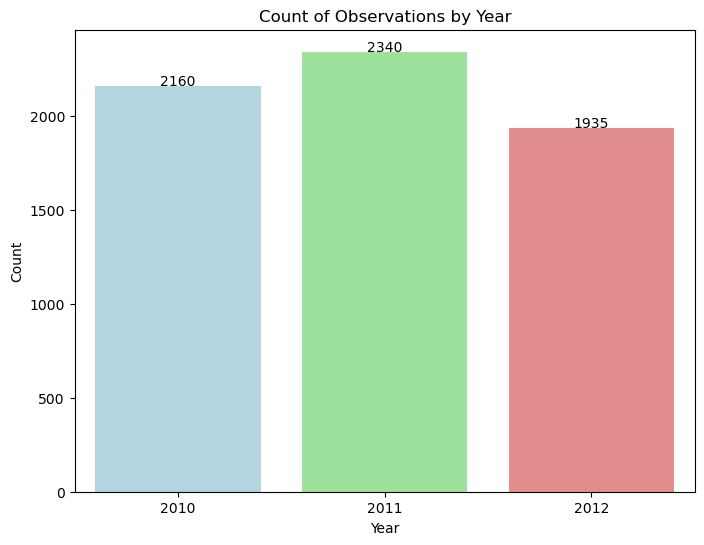

In [115]:
year_counts = df['year'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(data=df, x='year', ax=ax, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])

# Annotate the exact count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

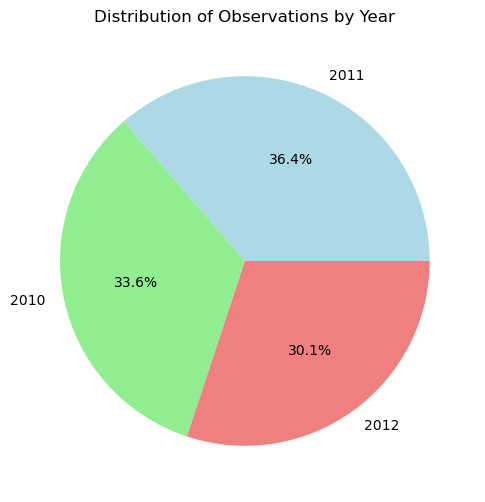

In [116]:
year_counts = df['year'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Distribution of Observations by Year')
plt.show()

Inference:- The above graph shows that the,In 2011 the most weekly sales are recorded.

Month

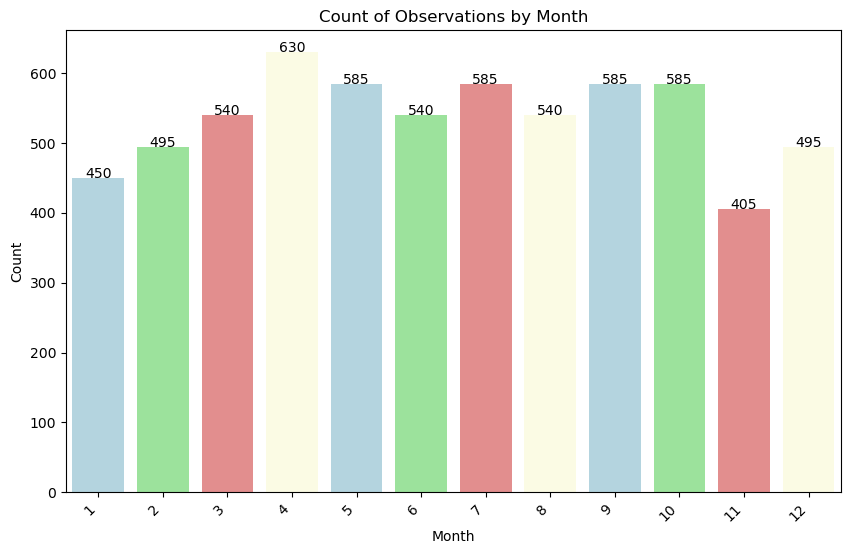

In [117]:
month_counts = df['month'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(data=df, x='month', ax=ax, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])

# Annotate the exact count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

The above graph shows that the in month of April most weekly sales are recorded.

In [118]:
#calculating total sales on holidays and regular days?
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0   1041256.38
1   1122887.89
Name: Weekly_Sales, dtype: float64

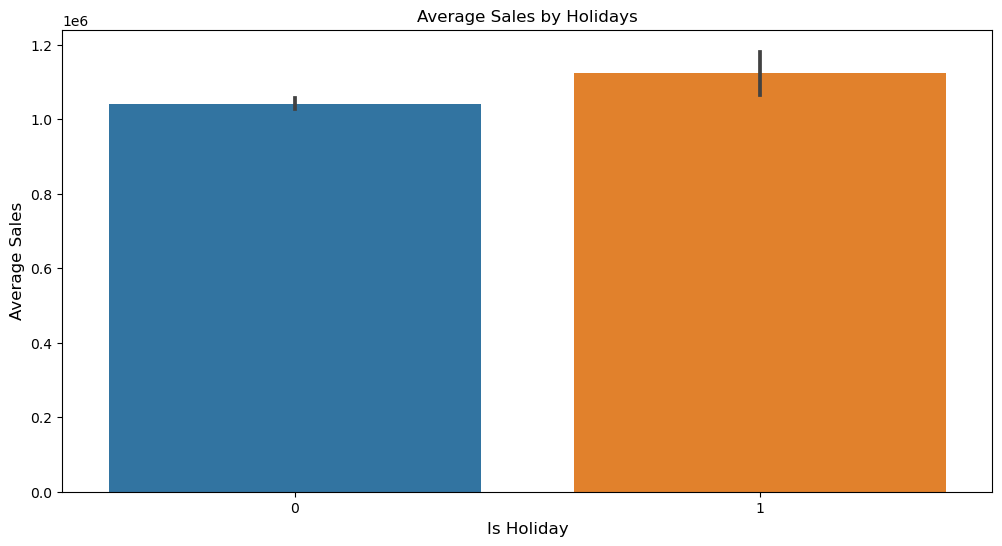

In [119]:
plt.figure(figsize = (12, 6))
sns.barplot(df,
            x = 'Holiday_Flag',
            y = 'Weekly_Sales',
            estimator = np.mean)

# Add labels and title
plt.title('Average Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Average Sales', size = 12)
plt.show()

In [120]:
#calculating the average sales on holidays and regular days

df.groupby('Holiday_Flag')['Weekly_Sales'].sum()

Holiday_Flag
0   6231919435.55
1    505299551.56
Name: Weekly_Sales, dtype: float64

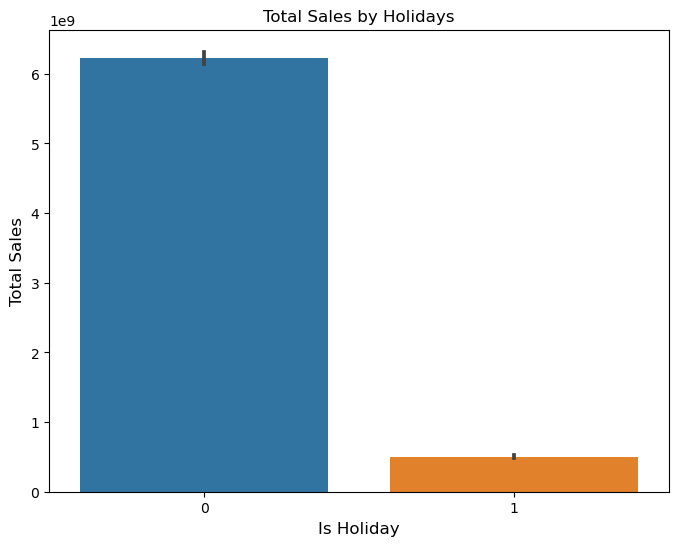

In [121]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df,
            x = 'Holiday_Flag',
            y = 'Weekly_Sales',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Total Sales', size = 12)
plt.show()

The rate of sales on holidays is higher than on other days.

Total sales on holidays are lower than on other days, which is normal because the number of holidays is very small compared with the number of other days.

In [122]:
#Calculating 
grp_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)
grp_store.head()

Store
20   301397792.46
4    299543953.38
14   288999911.34
13   286517703.80
2    275382440.98
Name: Weekly_Sales, dtype: float64

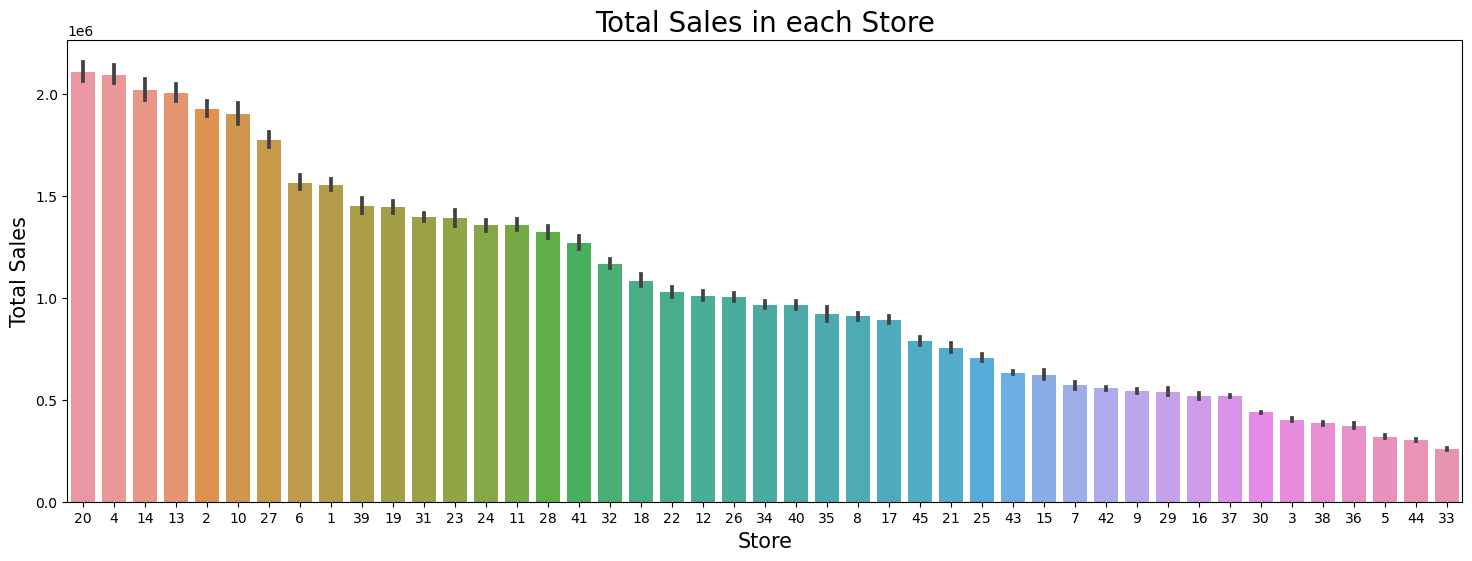

In [124]:
plt.figure(figsize = (18, 6))
sns.barplot(data=df,
            x = 'Store',
            y = 'Weekly_Sales',
            order = grp_store.index,)

# Add labels and title
plt.title('Total Sales in each Store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

Inference:There is a high variance in weekly sales from one store to another. Store No. 20 has the highest sales from any store with 301,397,792 followed by Store No. 4 with 299,543,953 and Store No. 33 comes last with 37,160,222$.

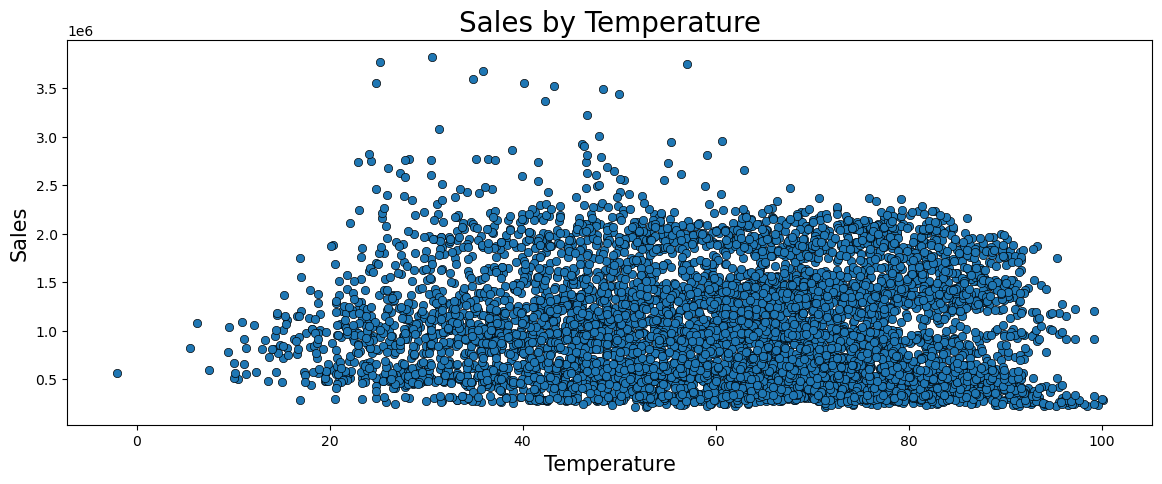

In [125]:
#calculating sales in the different temperatures

plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,
                x = 'Temperature',
                y = 'Weekly_Sales',
                edgecolor = "black")

# Add labels and title
plt.title('Sales by Temperature', size = 20)
plt.xlabel('Temperature', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

Inference:Sales are not affected by changes in temperature.

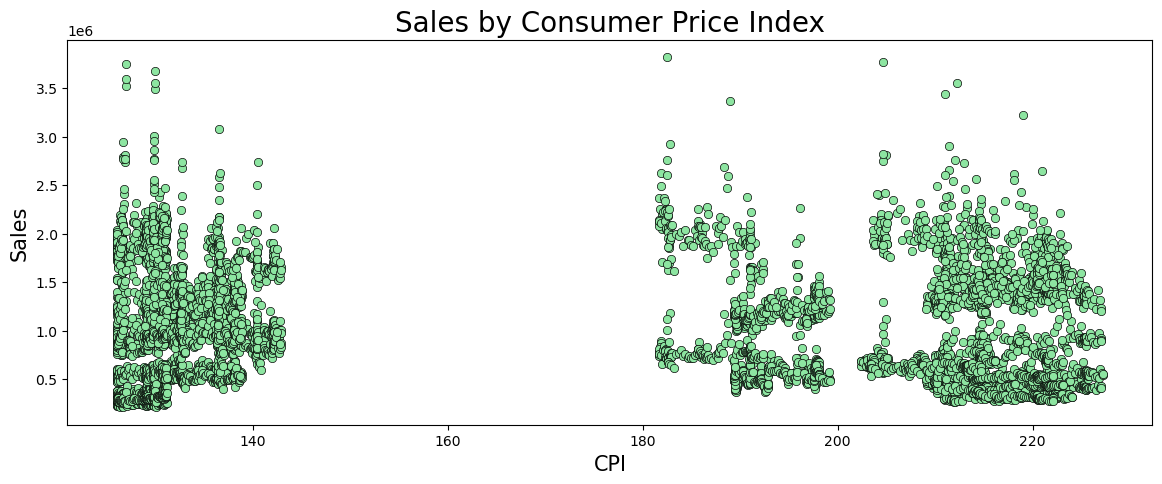

In [126]:
#Weekly_Sales And Cpi

plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,
                x = 'CPI',
                y = 'Weekly_Sales',
                color = '#8de5a1',
                edgecolor = "black")

# Add labels and title
plt.title('Sales by Consumer Price Index', size = 20)
plt.xlabel('CPI', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

Inference: Consumer Price Index (CPI) has little impact on sales. Based on the distribution of typical consumer prices in the figure above, clients can be categorized into two groups: clients that pay from 120 and 150 are considered middle-class clients. consumers who pay between 180 and 230 are considered high-class consumers

### Total Sales in each Year

In [127]:
df.groupby('year')['Weekly_Sales'].sum().sort_values(ascending = False)

year
2011   2448200007.35
2010   2288886120.41
2012   2000132859.35
Name: Weekly_Sales, dtype: float64

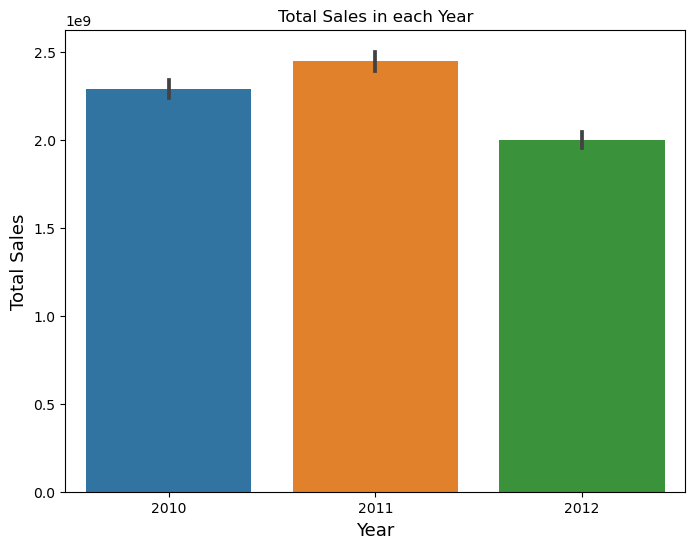

In [132]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df,
            x = 'year',
            y = 'Weekly_Sales',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales in each Year')
plt.xlabel('Year', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

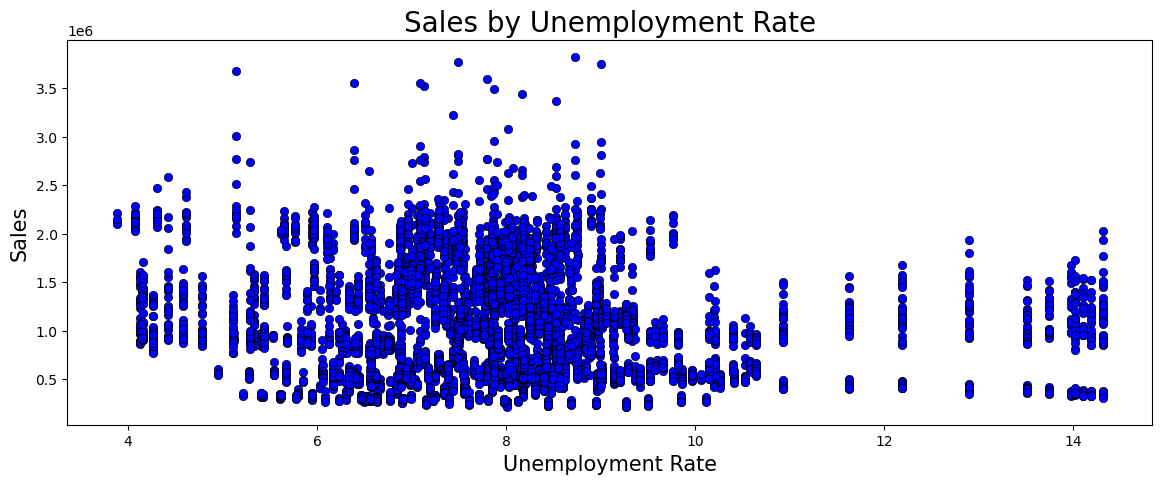

In [136]:
#Sales based on Unemployment Rate

plt.figure(figsize = (14, 5))
sns.scatterplot(data = df,
                x = 'Unemployment',
                y = 'Weekly_Sales',
                color = 'blue',
                edgecolor = 'black')

# Add labels and title
plt.title('Sales by Unemployment Rate', size = 20)
plt.xlabel('Unemployment Rate', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

Conclusion:Sales are affected by the unemployment rate, so the higher the unemployment rate, the lower the sales.

In [139]:
#total sales in each season

df.groupby('season')['Weekly_Sales'].sum().sort_values(ascending = False)

season
Spring   1826038445.58
Summer   1748077899.54
Fall     1661164284.48
Winter   1501938357.51
Name: Weekly_Sales, dtype: float64

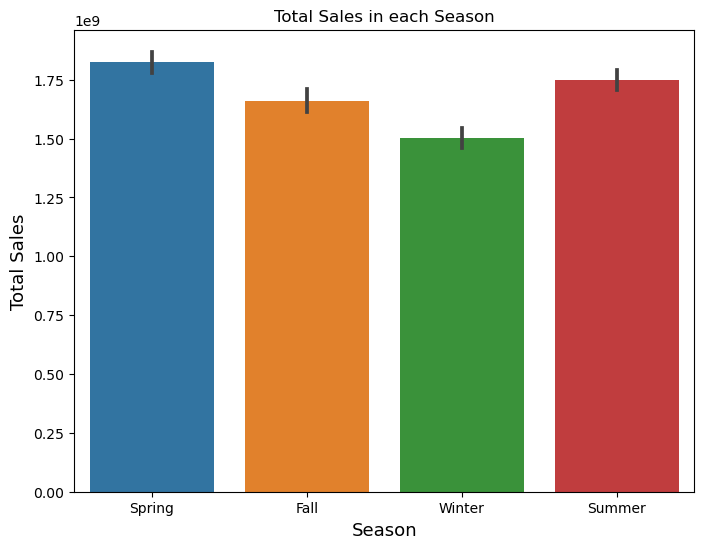

In [142]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df,
            x = 'season',
            y = 'Weekly_Sales',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales in each Season')
plt.xlabel('Season', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

Conclusion:Total sales for all years in Spring are the highest from all seasons, with 1826038445$.

In [143]:
#Total Sales in each Month
df.groupby('month')['Weekly_Sales'].sum().sort_values(ascending = False)

month
4    645323889.62
5    605696592.19
10   602918857.42
12   599076091.17
7    593313937.18
9    590532262.85
6    575017963.77
8    564231699.51
3    553486409.57
2    522025682.89
11   459169335.89
1    426426265.05
Name: Weekly_Sales, dtype: float64

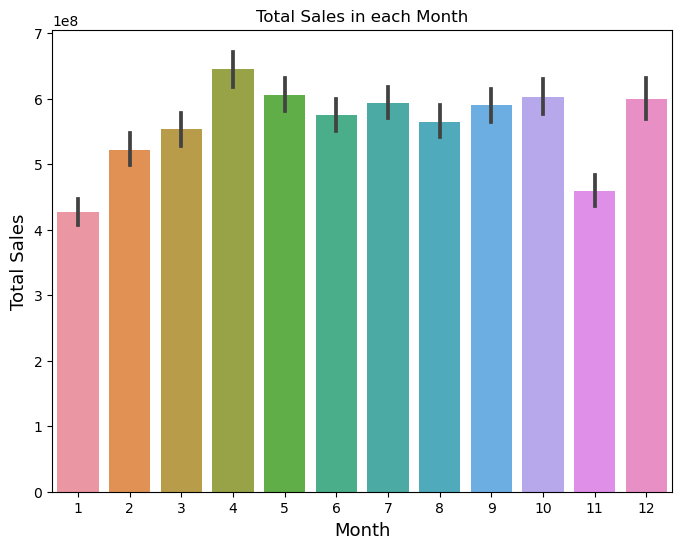

In [145]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df,
            x = 'month',
            y = 'Weekly_Sales',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales in each Month')
plt.xlabel('Month', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

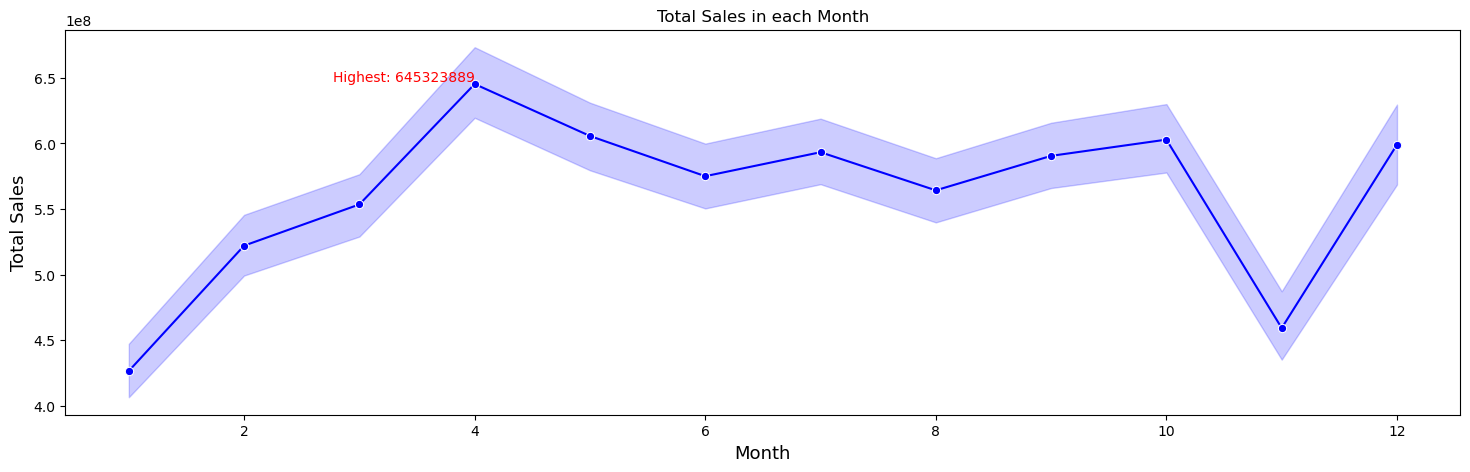

In [146]:
# Assuming you have a DataFrame with columns 'month' and 'weekly_sales'
plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=df, x='month', y='Weekly_Sales', estimator=np.sum, marker='o', color='blue')

# Find the index of the maximum total sales
max_sales_index = df.groupby('month')['Weekly_Sales'].sum().idxmax()

# Annotate the highest total sales value with the corresponding month name
max_sales_value = df.groupby('month')['Weekly_Sales'].sum().max()
ax.annotate(f'Highest: {int(max_sales_value)}', (max_sales_index, max_sales_value),
            ha='right', va='bottom', fontsize=10, color='red')

# Add labels and title
plt.title('Total Sales in each Month')
plt.xlabel('Month', size=13)
plt.ylabel('Total Sales', size=13)
plt.show()

Conclusion:Total sales for all years in April are the highest from any month, with 645323889$.

##### Total Sales in each year by Season

In [149]:
pd.pivot_table(data = df,
               index = 'year',
               columns = 'season',
               values = 'Weekly_Sales',
               aggfunc = 'sum')

season,Fall,Spring,Summer,Winter
year,,,,
2010,713464885.71,606859754.62,548508502.36,420052977.72
2011,666565619.71,601964593.62,643574381.22,536095412.80
2012,281133779.06,617214097.34,555995015.96,545789966.99


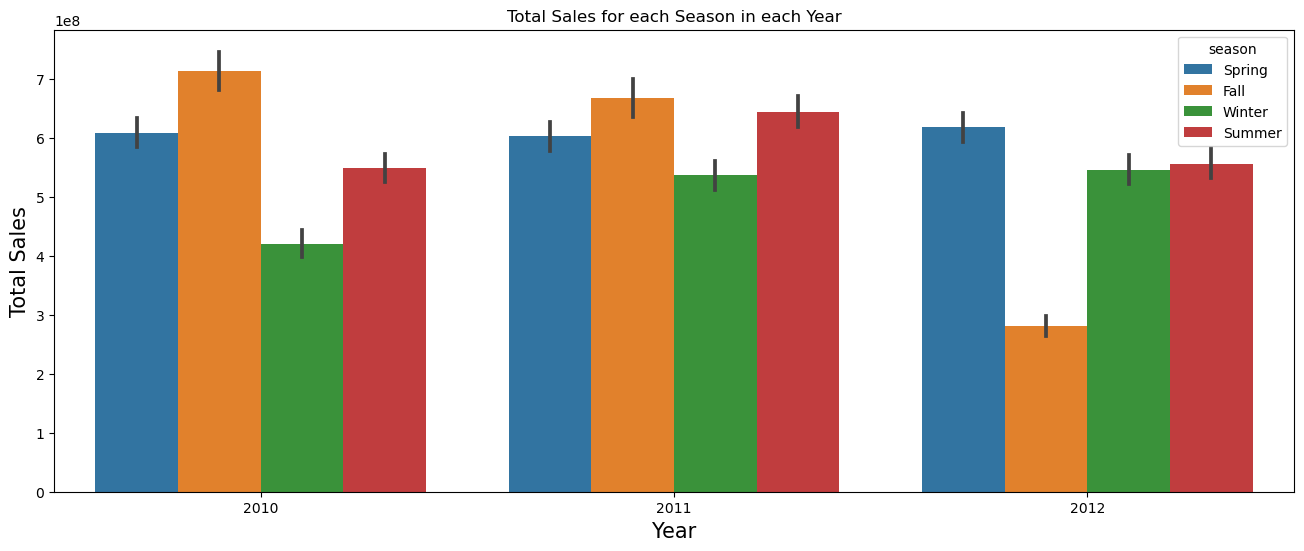

In [150]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df,
            x = 'year',
            y = 'Weekly_Sales',
            hue = 'season',
            estimator = np.sum)

# Add labels and title
plt.title('Total Sales for each Season in each Year')
plt.xlabel('Year', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()


Conclusion: Total sales in Spring 2010 were the highest in the three years, where:*

In 2010, total sales in Autumn were the highest with 713464885.

In 2011, total sales in Autumn were the highest with 666565619.

In 2012, total sales in Spring were the highest with 617214097.

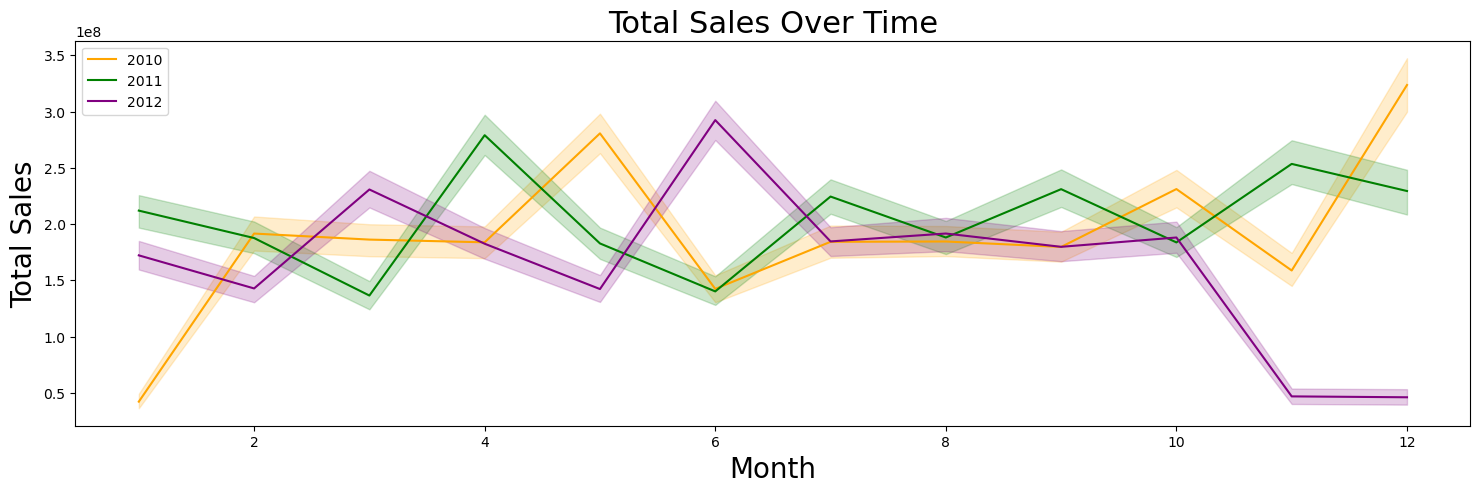

In [151]:
#sales over a time
years = ['2010', '2011', '2012']
colors = ['orange', 'green', 'purple']  # Change the colors as needed

plt.figure(figsize=(18, 5))
for i, year in enumerate(years):
    sns.lineplot(data=df[df['year'] == int(year)],
                 x='month',
                 y='Weekly_Sales',
                 estimator=np.sum,
                 color=colors[i],
                 label=year)

# Add labels and title
plt.title(f'Total Sales Over Time', size=22)
plt.xlabel('Month', size=20)
plt.ylabel('Total Sales', size=20)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Inference:Sales are similar in most months, but they increased at the end of 2010 and 2011 and decreased at the end of 2012.